# Predicting Abalone Ages Using Regression

## Project Goals and Description

**Source**

Data comes from an original (non-machine-learning) study:

Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994)

"The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait",
Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288)

**Data Description**

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

**Data Overview**

- Dataset Characteristics: _Multivariate_
- Number of Instances: _4177_
- Area: _Life_
- Attribute Characteristics: _Categorical, Integer, Real_
- Number of Attributes: _8_
- Date Donated: _1995-12-01_
- Associated Tasks: _Classification_
- Missing Values? _No_

**Attribute Information**

 Name | Data Type | Measurement Unit | Description
:-----|:----------|:-----------------|:-----------
Sex | nominal | - | M, F, and I (infant)
Length | continuous | mm | Longest shell measurement
Diameter | continuous | mm | perpendicular to length
Height | continuous | mm | with meat in shell
Whole weight | continuous | grams | whole abalone
Shucked weight | continuous | grams | weight of meat
Viscera weight | continuous | grams | gut weight (after bleeding)
Shell weight | continuous | grams | after being dried
Rings | integer | - | +1.5 gives the age in years

The number of rings is the value to predict: either as a continuous value or as a classification problem.

**Accuracy Comparison of Different Models Used on This Dataset**

The problem was originally encoded as a classification problem, leading to the following researches:

1. Sam Waugh (1995) "Extending and benchmarking Cascade-Correlation", PhD
   thesis, Computer Science Department, University of Tasmania.

  - Test set performance (final 1044 examples, first 3133 used for training):
	  - 24.86% Cascade-Correlation (no hidden nodes)
	  - 26.25% Cascade-Correlation (5 hidden nodes)
	  - 21.5%  C4.5
	  -  0.0%  Linear Discriminate Analysis
	  -  3.57% k=5 Nearest Neighbour

> _Dataset samples are highly overlapped.  Further information is required
>	to separate completely using affine combinations.  Other restrictions
>	to data set examined._

2. David Clark, Zoltan Schreter, Anthony Adams "A Quantitative Comparison of
   Dystal and Backpropagation", submitted to the Australian Conference on
   Neural Networks (ACNN'96). Data set treated as a 3-category classification
   problem (grouping ring classes 1-8, 9 and 10, and 11 on).

  - Test set performance (3133 training, 1044 testing as above):
    - 64%    Backprop
    - 55%    Dystal

I will be using a different approach to this problem: by using Regression Trees.

**Why Regression [Trees]?**

The original method used to solve this problem is highly inefficient; there are just too many labels to work through and too little data. A regression task would be much more suited to this type of problem.

The use of trees is decided because of the uncertainty of a linear correlation between feature and target variables.

**Papers Citing This Dataset**

A complete list of researches on this dataset are available in [this link](https://archive.ics.uci.edu/ml/datasets/Abalone).

## Initial Steps

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',
                 names=['sex', 'length', 'diameter', 'height', 'wweight', 'sweight', 'vweight', 'shweight', 'rings'])
df.head()

,sex,length,diameter,height,wweight,sweight,vweight,shweight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       4177 non-null   object 
 1   length    4177 non-null   float64
 2   diameter  4177 non-null   float64
 3   height    4177 non-null   float64
 4   wweight   4177 non-null   float64
 5   sweight   4177 non-null   float64
 6   vweight   4177 non-null   float64
 7   shweight  4177 non-null   float64
 8   rings     4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
df.sex.unique()

array(['M', 'F', 'I'], dtype=object)

## Splitting the Data

In [ ]:
X = df.drop(columns=['rings'])
y = df.rings

In [ ]:
X_encoded = pd.get_dummies(X, columns=['sex'])
X_encoded.head()

,length,diameter,height,wweight,sweight,vweight,shweight,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=10)

## Training the Initial Model

In [ ]:
dtr = DecisionTreeRegressor(random_state=10)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [ ]:
dtr.score(X_test, y_test)

0.14777216238713997

## Optimizing the Model

In [ ]:
path = dtr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas.shape

(1422,)

In [ ]:
ccp_alphas = ccp_alphas[ccp_alphas < 0.2]

In [ ]:
dtrs = []
for alpha in ccp_alphas:
  dt = DecisionTreeRegressor(random_state=10, ccp_alpha=alpha)
  dt.fit(X_train, y_train)
  dtrs.append(dt)

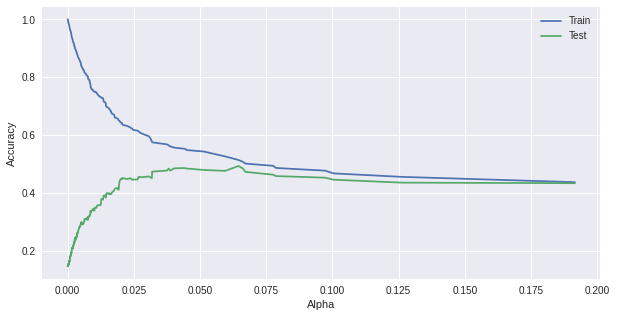

In [ ]:
train_scores = [dt.score(X_train, y_train) for dt in dtrs]
test_scores = [dt.score(X_test, y_test) for dt in dtrs]

plt.figure(figsize=(10, 5))
plt.style.use('seaborn')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas, train_scores, label='Train')
plt.plot(ccp_alphas, test_scores, label='Test')

plt.legend()
plt.show()

In [ ]:
test_scores = [(dt.score(X_test, y_test), dt.get_params()) for dt in dtrs]
best_params = max(test_scores, key=lambda x: x[0])
best_params

(0.4936880794704137,
 {'ccp_alpha': 0.06452959963127675,
  'criterion': 'mse',
  'max_depth': None,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_impurity_split': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'presort': 'deprecated',
  'random_state': 10,
  'splitter': 'best'})

In [ ]:
ideal_alpha = best_params[1]['ccp_alpha']
ideal_alpha

0.06452959963127675